In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Absolute Sobel (Gradient) Thresholding

In [2]:
def abs_sobel_thresh(img, orient = 'x', sobel_kernel = 3, thresh = (0, 255)):
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Define orientation values
    if orient == 'x':
        x = 1
    elif orient == 'y':
        x = 0
    y = 1 - x
    
    # Take the derivative wrt to the orientation
    sobel = cv2.Sobel(gray, cv2.CV_64F, x, y)
    
    # Take the absolute value of the gradient
    abs_sobel = np.absolute(sobel)
    
    # Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a mask of 1 based on thresholds
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    
    # Return the binary masked image
    return grad_binary
    

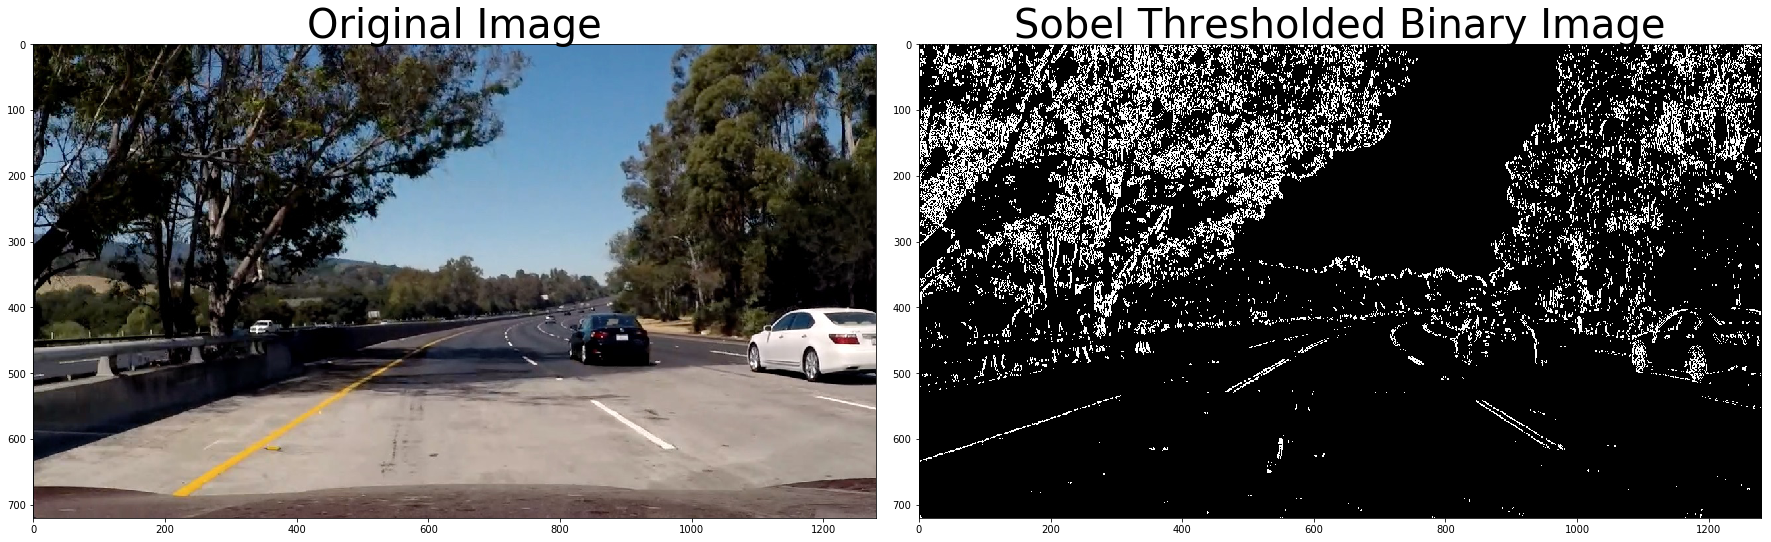

In [3]:
image = plt.imread('test_images/test5.jpg')
result = abs_sobel_thresh(image, 'x', sobel_kernel = 5, thresh = (20, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result, cmap = 'gray')
ax2.set_title('Sobel Thresholded Binary Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Magnitude Sobel Thresholding

In [4]:
def mag_thresh(image, sobel_kernel = 3, thresh = (0, 255)):
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Take Sobel 'x' and 'y' gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    # Calculate the magnitude
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    
    # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(magnitude)/255
    magnitude = (magnitude/scale_factor).astype(np.uint8)

    # Create a binary mask where mag thresholds are met
    mag_binary = np.zeros_like(magnitude)
    mag_binary[(magnitude >= thresh[0]) & (magnitude <= thresh[1])] = 1
   
    # Return the thresholded image
    return mag_binary

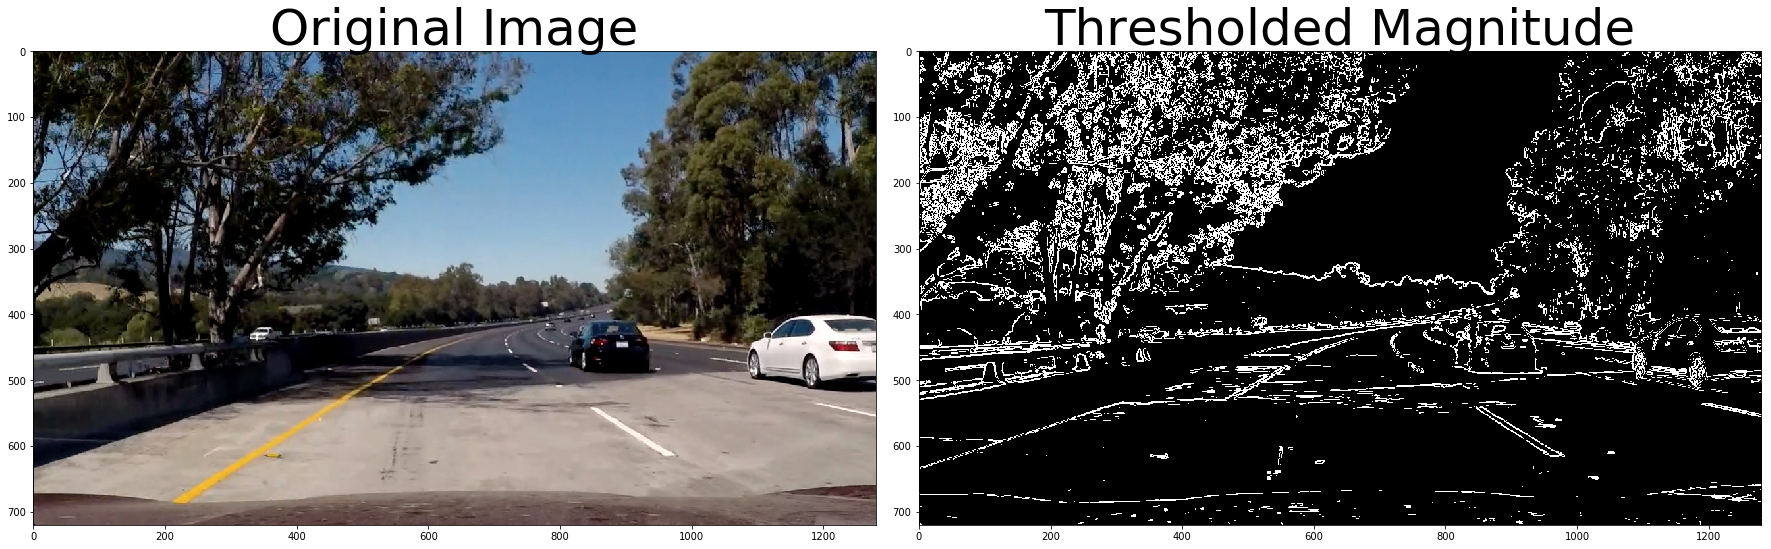

In [5]:
image = plt.imread('test_images/test5.jpg')
mag_binary = mag_thresh(image, sobel_kernel=3, thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Direction Thresholding

In [6]:
def dir_thresh(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    # Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    direction_gradient = np.arctan2(abs_sobely, abs_sobelx)
    
    # Create a binary mask where direction thresholds are met
    dir_binary = np.zeros_like(direction_gradient)
    dir_binary[(direction_gradient >= thresh[0]) & (direction_gradient <= thresh[1])] = 1
    
    # Return direction-thresholded image    
    return dir_binary

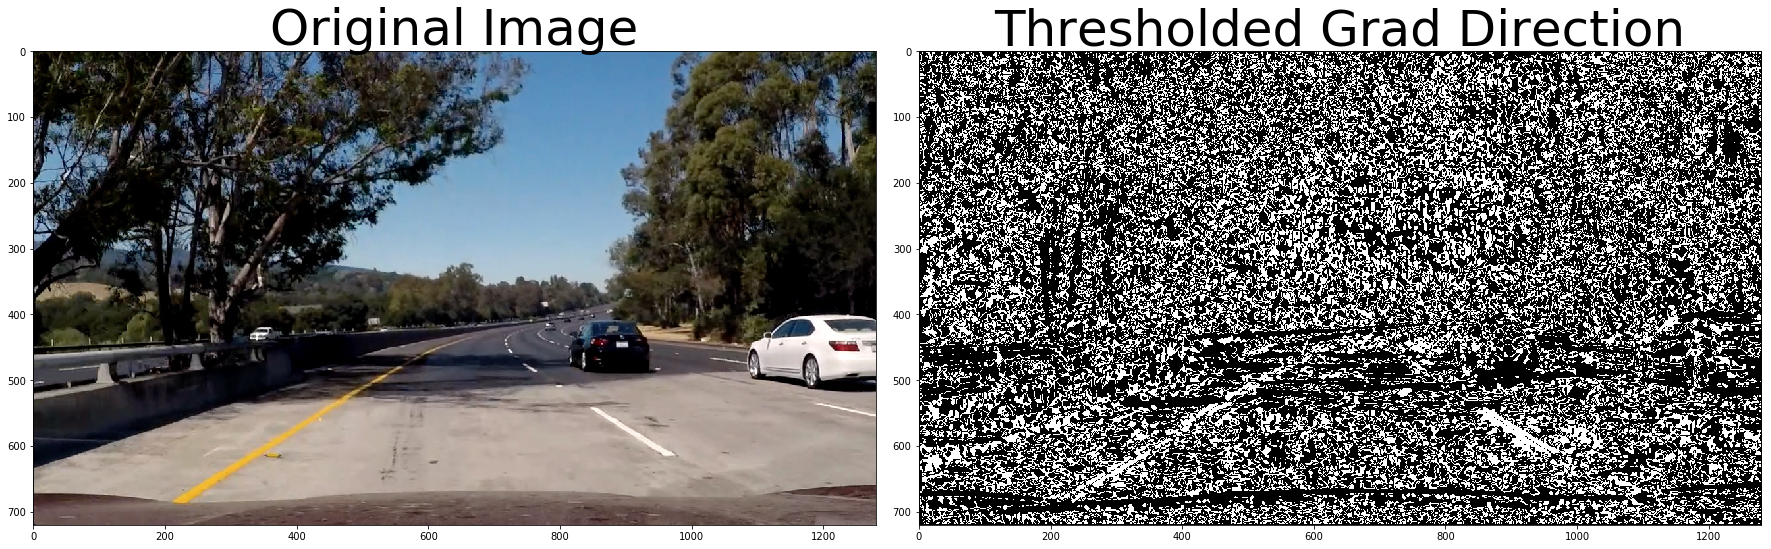

In [26]:
image = plt.imread('test_images/test5.jpg')
# Run the function
dir_binary = dir_thresh(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad Direction', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# S Channel (from HLS) Thresholding

In [8]:
def hls_thresh(img, thresh=(0, 255)):
    
    # Convert to HLS color space
    image_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    # Apply a threshold to the S channel
    S = image_hls[:, :, 2]
    binary_output = np.zeros_like(S)
    binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1
    
    # Return a binary image of threshold result
    return binary_output  


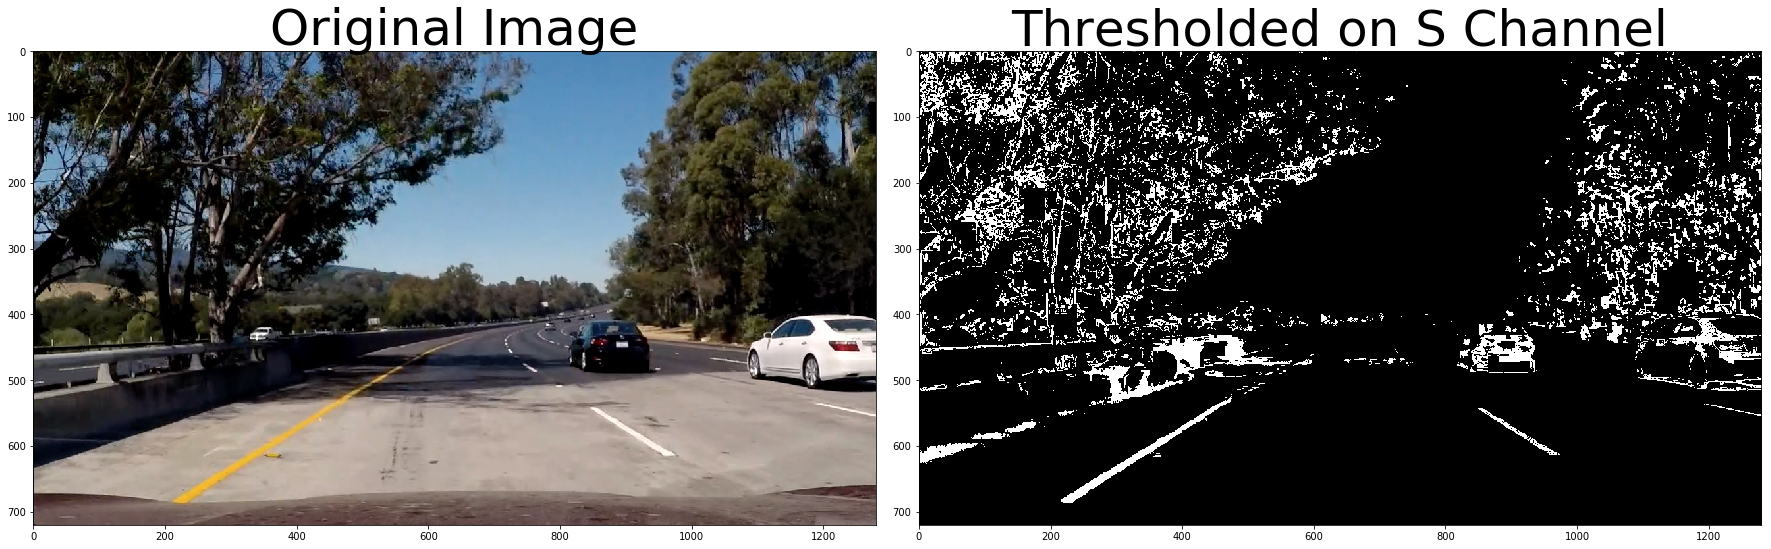

In [9]:
image = plt.imread('test_images/test5.jpg')
hls_binary = hls_thresh(image, thresh=(150, 255))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded on S Channel', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Combined Thresholds

In [10]:
def combined_thresh(img, abs_thresh = (20, 100), magnitude_thresh = (30, 100), \
                         angle_thresh = (0.7, 1.3), s_thresh = (140, 255)):
    
    gradx = abs_sobel_thresh(img, orient = 'x', sobel_kernel = 3, thresh = abs_thresh)
    grady = abs_sobel_thresh(img, orient = 'y', sobel_kernel = 3, thresh = abs_thresh)
    mag_binary = mag_thresh(img, sobel_kernel = 3, thresh = magnitude_thresh)
    dir_binary = dir_thresh(img, sobel_kernel = 3, thresh = angle_thresh)
    s_binary = hls_thresh(img, thresh = s_thresh)
    
    
    combined_binary = np.zeros_like(gradx)
    combined_binary[(gradx == 1) & (grady ==1) | (mag_binary == 1) & (dir_binary == 1) | s_binary == 1] = 1
    
    return combined_binary

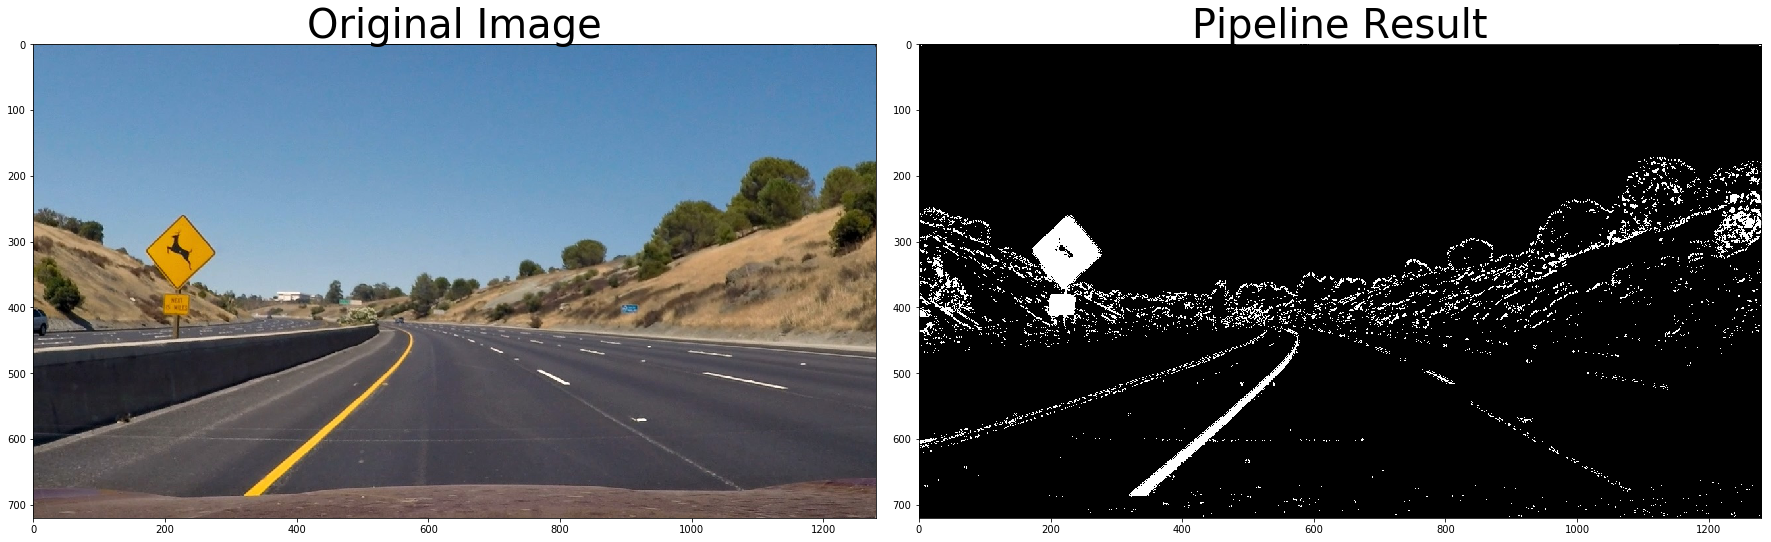

In [11]:
image = plt.imread("test_images/test2.jpg")
result = combined_thresh(image)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result, cmap = 'gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [12]:
def perspective_transform(image):
    src=np.float32([[195,720],[590,460],[700,460],[1120,720]])
    dst=np.float32([[350,720],[410,0],[970,0],[1000,720]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    img_size=(image.shape[1],image.shape[0])
    print(M.shape,Minv.shape)
    warped = cv2.warpPerspective(image, M, img_size, flags=cv2.INTER_LINEAR)
    return warped,Minv,M

(3, 3) (3, 3)


(-0.5, 1279.5, 719.5, -0.5)

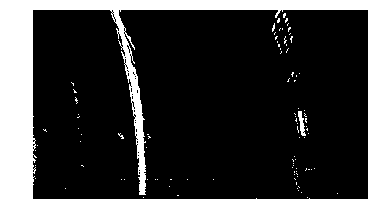

In [13]:
binary_warped,Minv,M=perspective_transform(result)
plt.imshow(binary_warped, cmap='gray')
plt.axis('off')